In [821]:
### Import/Data Collections
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [822]:
### Getting data from Yahoo finance
start = '2010-01-01'
end = '2019-11-20'
df= pdr.DataReader('TSLA','yahoo',start,end)

In [823]:


df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [824]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-14,70.767998,68.582001,69.222000,69.870003,32324500,69.870003
2019-11-15,70.559998,69.671997,70.127998,70.433998,24045000,70.433998
2019-11-18,70.629997,69.220001,70.584000,69.998001,22002000,69.998001
2019-11-19,71.998001,69.559998,70.349998,71.903999,38624000,71.903999
2019-11-20,72.239998,69.914001,72.000000,70.444000,33625500,70.444000


In [825]:
df1=df['Close']
print(df1)
## selecting only Close colummn
df1=df.reset_index()['Close']
df1.head()
df1.tail()

Date
2010-06-29     4.778000
2010-06-30     4.766000
2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
                ...    
2019-11-14    69.870003
2019-11-15    70.433998
2019-11-18    69.998001
2019-11-19    71.903999
2019-11-20    70.444000
Name: Close, Length: 2367, dtype: float64


2362    69.870003
2363    70.433998
2364    69.998001
2365    71.903999
2366    70.444000
Name: Close, dtype: float64

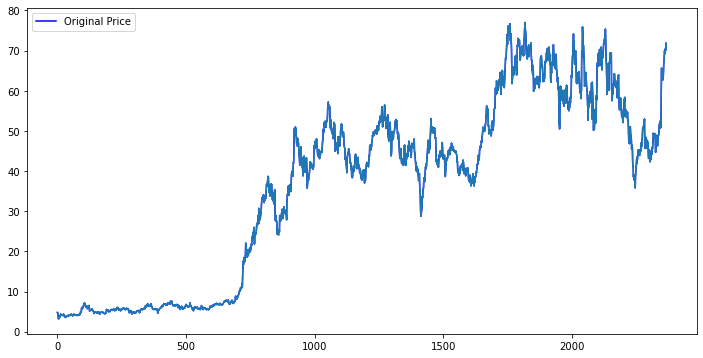

In [826]:
##Not in use right now
plt.figure(figsize=(12,6))
plt.plot(df1,'blue',label = 'Original Price')
#plt.plot(trainPredictPlot,'orange',label=' Trained Price')
#plt.plot(testPredictPlot,'black',label=' Test Price')
plt.legend()
#plt.show()
plt.plot(df1)

In [827]:
df2=df['Close']
print(df2)

Date
2010-06-29     4.778000
2010-06-30     4.766000
2010-07-01     4.392000
2010-07-02     3.840000
2010-07-06     3.222000
                ...    
2019-11-14    69.870003
2019-11-15    70.433998
2019-11-18    69.998001
2019-11-19    71.903999
2019-11-20    70.444000
Name: Close, Length: 2367, dtype: float64


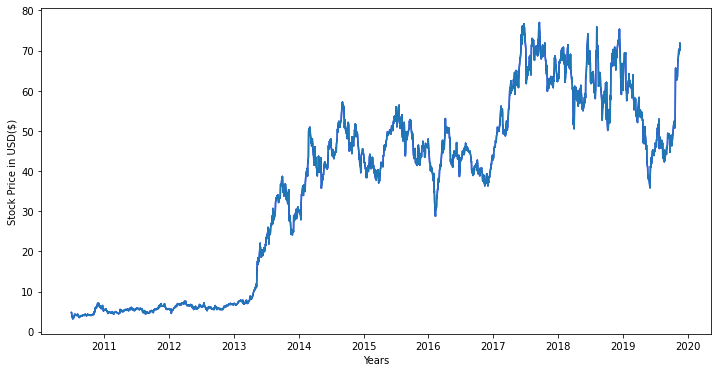

In [828]:
## Plotting Price vs date
plt.figure(figsize=(12,6))
plt.plot(df2,'blue')
plt.xlabel("Years")
plt.ylabel("Stock Price in USD($)")

plt.plot(df2)


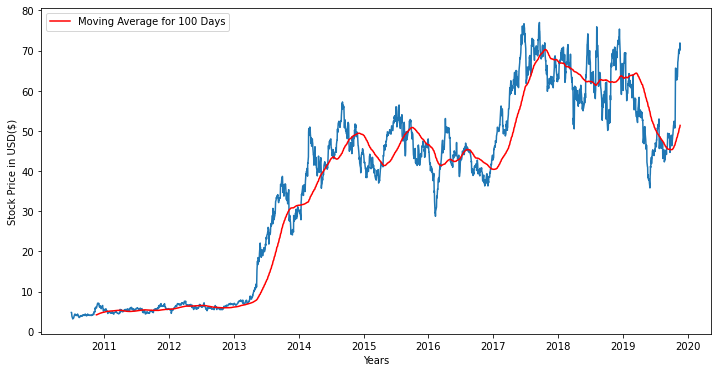

In [829]:
ma100 = df.Close.rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.xlabel("Years")
plt.ylabel("Stock Price in USD($)")

plt.plot(ma100,'r',label='Moving Average for 100 Days')

plt.legend()

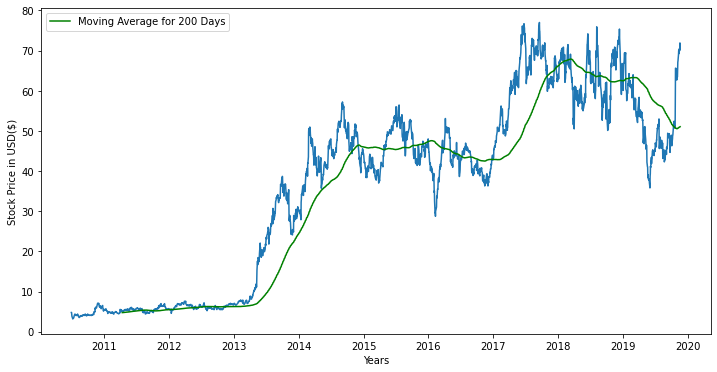

In [830]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.xlabel("Years")
plt.ylabel("Stock Price in USD($)")
plt.plot(ma200,'g',label='Moving Average for 200 Days')
plt.legend()

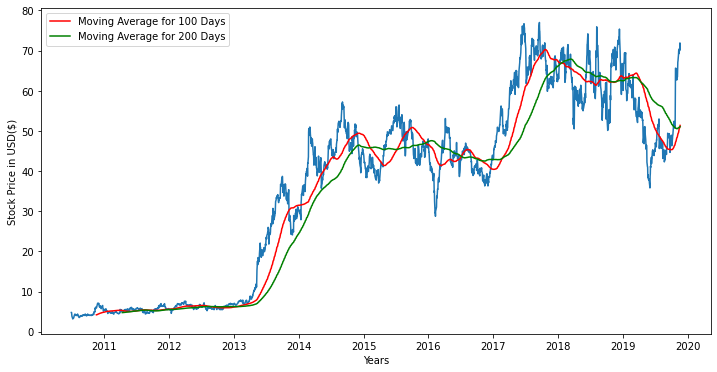

In [831]:

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.xlabel("Years")
plt.ylabel("Stock Price in USD($)")

plt.plot(ma100,'r',label='Moving Average for 100 Days')
plt.plot(ma200,'g',label='Moving Average for 200 Days')

plt.legend()

In [832]:
df1

0        4.778000
1        4.766000
2        4.392000
3        3.840000
4        3.222000
          ...    
2362    69.870003
2363    70.433998
2364    69.998001
2365    71.903999
2366    70.444000
Name: Close, Length: 2367, dtype: float64

In [833]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.02191224]
 [0.02174973]
 [0.01668473]
 ...
 [0.90517336]
 [0.93098591]
 [0.91121344]]


In [834]:
##splitting dataset into training and testing
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [835]:
training_size,test_size

(1893, 474)

In [836]:
train_data

array([[0.02191224],
       [0.02174973],
       [0.01668473],
       ...,
       [0.80051463],
       [0.82537924],
       [0.81649513]])

In [837]:
import numpy
# convert an array of values into a dataset matrix 
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [838]:
# reshape
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [839]:
print(x_train.shape), print(y_train.shape)

(1792, 100)
(1792,)


(None, None)

In [840]:
print(x_test.shape), print(y_test.shape)

(373, 100)
(373,)


(None, None)

In [841]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [842]:
### Create Stacked LSTM model and importing models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [843]:
##adding more nodes and layers can increase the efficiency
model=Sequential()
model.add(LSTM(units = 50, return_sequences=True,input_shape=(x_train.shape[1],1)))
#model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
#model.add(LSTM(units=50,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units=50))
#model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [844]:
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_56 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_57 (LSTM)              (None, 50)                20200     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [845]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=32,verbose=1)
validation_data=(x_test,y_test)


Epoch 1/200
56/56 [==============================] - 10s 112ms/step - loss: 0.0225 - val_loss: 0.0056
Epoch 2/200
56/56 [==============================] - 6s 103ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 3/200
56/56 [==============================] - 6s 103ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 4/200
56/56 [==============================] - 5s 97ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 5/200
56/56 [==============================] - 5s 92ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 6/200
56/56 [==============================] - 5s 98ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 7/200
56/56 [==============================] - 6s 101ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 8/200
56/56 [==============================] - 5s 94ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 9/200
56/56 [==============================] - 5s 93ms/step - loss: 9.6389e-04 - val_loss: 0.0032
Epoch 10/200
56/56 [==============================] - 5s 89ms/step - loss: 8.8474e-04 - val

56/56 [==============================] - 5s 92ms/step - loss: 2.3361e-04 - val_loss: 8.6641e-04
Epoch 79/200
56/56 [==============================] - 5s 89ms/step - loss: 2.0834e-04 - val_loss: 8.5645e-04
Epoch 80/200
56/56 [==============================] - 5s 89ms/step - loss: 2.3123e-04 - val_loss: 9.8818e-04
Epoch 81/200
56/56 [==============================] - 5s 89ms/step - loss: 2.4647e-04 - val_loss: 8.1948e-04
Epoch 82/200
56/56 [==============================] - 5s 88ms/step - loss: 2.2379e-04 - val_loss: 9.1019e-04
Epoch 83/200
56/56 [==============================] - 5s 90ms/step - loss: 2.0960e-04 - val_loss: 0.0010
Epoch 84/200
56/56 [==============================] - 5s 89ms/step - loss: 2.1175e-04 - val_loss: 8.2790e-04
Epoch 85/200
56/56 [==============================] - 5s 91ms/step - loss: 2.0255e-04 - val_loss: 8.2173e-04
Epoch 86/200
56/56 [==============================] - 5s 89ms/step - loss: 2.1561e-04 - val_loss: 8.1616e-04
Epoch 87/200
56/56 [================

56/56 [==============================] - 5s 83ms/step - loss: 2.1899e-04 - val_loss: 8.5090e-04
Epoch 154/200
56/56 [==============================] - 5s 83ms/step - loss: 2.2703e-04 - val_loss: 0.0010
Epoch 155/200
56/56 [==============================] - 5s 82ms/step - loss: 2.1100e-04 - val_loss: 8.0457e-04
Epoch 156/200
56/56 [==============================] - 5s 81ms/step - loss: 2.4339e-04 - val_loss: 8.2166e-04
Epoch 157/200
56/56 [==============================] - 5s 82ms/step - loss: 2.0085e-04 - val_loss: 8.0078e-04
Epoch 158/200
56/56 [==============================] - 5s 84ms/step - loss: 2.3055e-04 - val_loss: 8.3122e-04
Epoch 159/200
56/56 [==============================] - 5s 82ms/step - loss: 1.9726e-04 - val_loss: 8.1192e-04
Epoch 160/200
56/56 [==============================] - 5s 82ms/step - loss: 2.0986e-04 - val_loss: 8.1860e-04
Epoch 161/200
56/56 [==============================] - 5s 82ms/step - loss: 2.1170e-04 - val_loss: 8.0529e-04
Epoch 162/200
56/56 [=======

In [874]:
model.save('keras_model200.h5')

In [846]:
### Lets Do the prediction and check performance metrics
x_predict=model.predict(x_train)
y_predict=model.predict(x_test)


In [847]:
##Transformback to original form
x_predict=scaler.inverse_transform(x_predict)
y_predict=scaler.inverse_transform(y_predict)
#print(x_predict)
#print(y_predict)

In [848]:
#print(validation_data)

In [849]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,x_predict))

38.434119096724714

In [850]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,y_predict))

57.59927017191162

In [851]:
#scaler.scale_


In [852]:
#scale_factor = 1/1.
#y_predicted = Y_predict * scale_factor
#x_predicted = X_predict * scale_factor
#print(y_predicted)
#print(x_predicted)

NameError: name 'y_predicted' is not defined

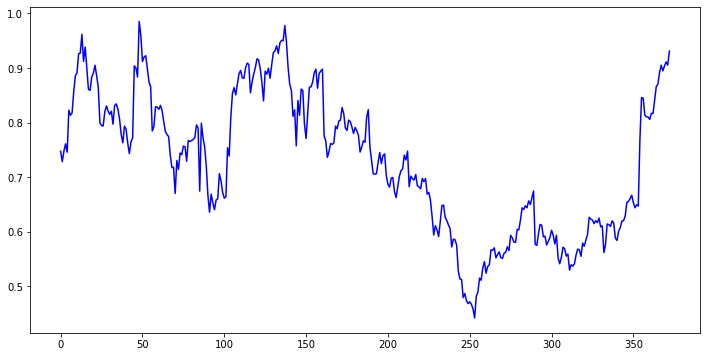

In [853]:
### Plotting 

# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'o',label='Predicted Price')

plt.legend()

plt.show()


In [854]:
plt.figure(figsize=(12,6))
plt.plot(ytest,'b',label='Original Price')
plt.plot(y_predicted,'orange',label='Predicted Price')

plt.legend()

plt.show()

NameError: name 'ytest' is not defined

<Figure size 864x432 with 0 Axes>

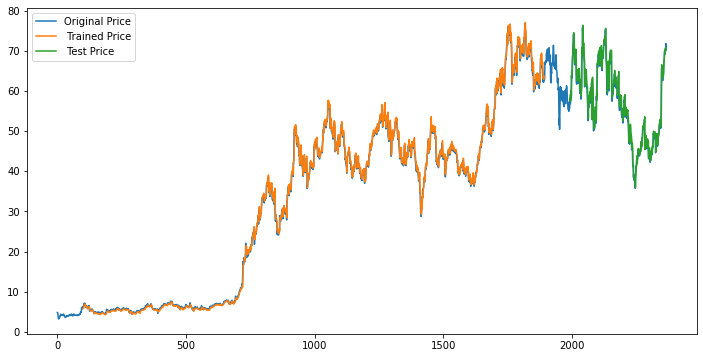

In [855]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(x_predict)+look_back, :] = x_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(x_predict)+(look_back*2)+1:len(df1)-1, :] = y_predict
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1),label='Original Price')
#plt.plot(scaler.inverse_transform(df2),label='Original Price')
plt.plot(trainPredictPlot,label=' Trained Price')
plt.plot(testPredictPlot,label=' Test Price')
plt.legend()
plt.show()


In [856]:
len(test_data)

474

In [857]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [858]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

100

In [859]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [860]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
#print(day_new)

In [861]:
import matplotlib.pyplot as plt

In [862]:
len(df1)


2367

In [863]:
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


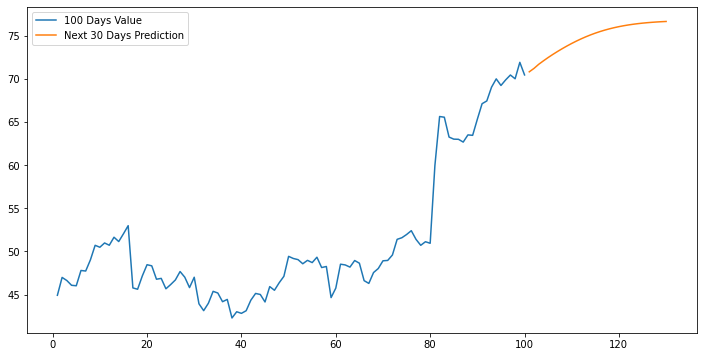

In [864]:
plt.figure(figsize=(12,6))
#plt.plot(ytest,'b',label='Original Price')
#plt.plot(y_predicted,'orange',label='Predicted Price')


plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]),label='100 Days Value')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label ='Next 30 Days Prediction')
plt.legend()
#print(scaler.inverse_transform(lst_output))

In [865]:
start1 = '2019-11-20'
end2 = '2019-12-20'
df5= pdr.DataReader('TSLA','yahoo',start1,end2)

In [866]:
df5.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-20,72.239998,69.914001,72.000000,70.444000,33625500,70.444000
2019-11-21,72.167999,70.800003,70.902000,70.966003,30550000,70.966003
2019-11-22,68.199997,66.000000,68.031998,66.608002,84353000,66.608002
2019-11-25,68.914001,66.891998,68.863998,67.267998,61697500,67.267998
2019-11-26,67.099998,65.419998,67.054001,65.783997,39737000,65.783997


In [867]:
df5.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-16,76.722000,72.500000,72.510002,76.300003,90871000,76.300003
2019-12-17,77.099998,75.180000,75.797997,75.797997,42484000,75.797997
2019-12-18,79.043999,76.115997,76.125999,78.629997,70605000,78.629997
2019-12-19,81.370003,79.300003,79.463997,80.807999,90535500,80.807999
2019-12-20,82.599998,80.038002,82.057999,81.117996,73763500,81.117996


In [868]:
df5=df5['Close']
## selecting only Close colummn
df5=df5.reset_index()['Close']

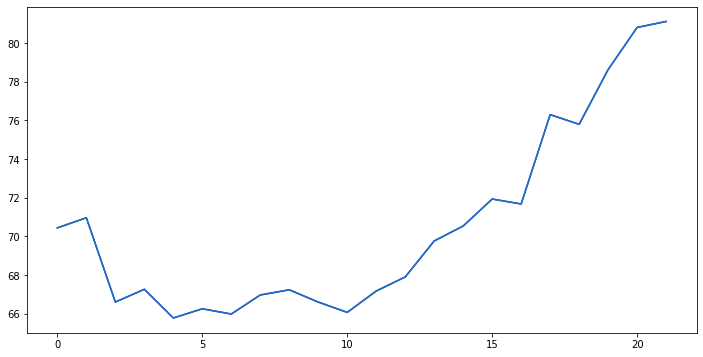

In [869]:
##Not in use right now
plt.figure(figsize=(12,6))
plt.plot(df5,'blue')
#plt.plot(trainPredictPlot,'orange',label=' Trained Price')
#plt.plot(testPredictPlot,'black',label=' Test Price')
#plt.legend()
#plt.show()
plt.plot(df5)

In [870]:
df3=df1.tolist()
print(len(df3))

2367


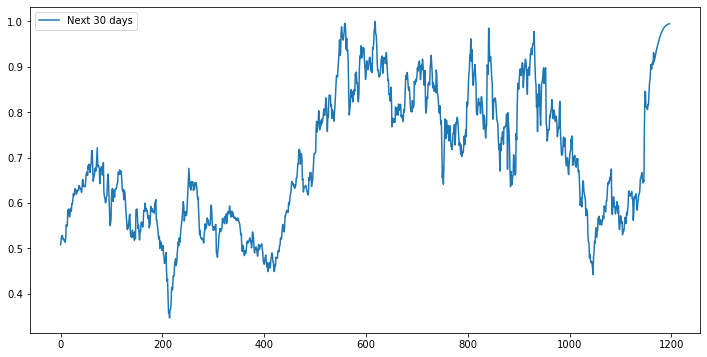

In [871]:
plt.figure(figsize=(12,6))


df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:],label='Next 30 days')
plt.legend()

In [872]:
df3=scaler.inverse_transform(df3).tolist()

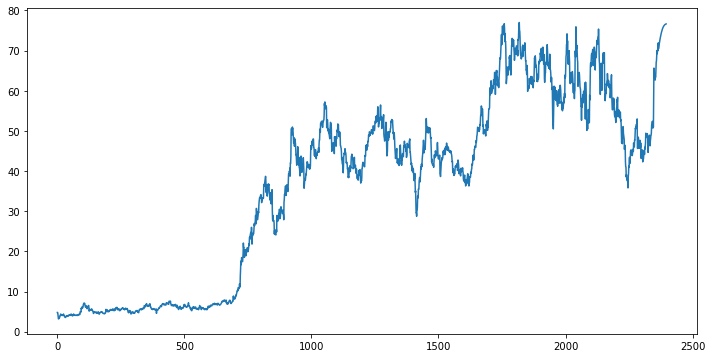

In [873]:
plt.figure(figsize=(12,6))
plt.plot(df3)